In [14]:
import pandas as pd
from pathlib import Path
import matplotlib as plt
import numpy as np
import sqlalchemy
import yfinance as yf
import yahoo_fin.stock_info as si
import os
import panel as pn


In [15]:
# Using the Pandas read_csv funcion and the Path module, 
# read "sp500_sustainability_scores.csv" file into a Pandas DataFrame
esg_df = pd.read_csv(
    Path("sp500_sustainability_scores.csv")
)

# Review the DataFrame
esg_df.head()

,Unnamed: 0,palmOil,controversialWeapons,gambling,socialScore,nuclear,furLeather,alcoholic,gmo,catholic,...,coal,pesticides,adult,percentile,peerGroup,smallArms,environmentScore,governancePercentile,militaryContract,company_ticker
0,Value,False,False,False,8.65,False,False,False,False,True,...,False,False,False,10.48,Pharmaceuticals,False,0.34,0,False,A
1,Value,False,False,False,12.31,False,False,False,False,False,...,False,False,False,58.47,Transportation,False,11.53,0,False,AAL
2,Value,False,False,False,9.17,False,False,False,False,False,...,False,False,False,5.74,Retailing,False,0.10,0,False,AAP
3,Value,False,False,False,6.86,False,False,False,False,False,...,False,False,False,12.87,Technology Hardware,False,0.65,0,False,AAPL
4,Value,False,False,False,16.92,False,False,False,False,True,...,False,False,False,53.78,Pharmaceuticals,False,1.12,0,False,ABBV


In [16]:
# Create the connection string for your SQLite database
database_connection_string = 'sqlite:///'

# Pass the connection string to the SQLAlchemy create_engine function
engine = sqlalchemy.create_engine(database_connection_string)

# Confirm that the database engine was created.
engine

Engine(sqlite:///)

In [17]:
esg_df.to_sql(
    'esg_score_info', #New table name
    engine, 
    index=False, 
    if_exists='replace'
)

# Confirm that the table was created by calling the table_names function
engine.table_names()

/Users/puntepbhayakaporn/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:9: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  if __name__ == '__main__':


['esg_score_info']

In [18]:
# e_score = 10
# s_score = 10
# g_score = 8

# Create and execute a query to return all columns for the 10 highest credit scores.
# query1 = """
# SELECT company_ticker, environmentScore, socialScore, governanceScore
# FROM esg_score_info
# WHERE environmentScore >= """+str(e_score)+""" AND socialScore >= """+str(s_score)+""" AND governanceScore >= """+str(g_score)+""";
# """

## , environmentScore, socialScore, governanceScore

# Call on the database engine to execute the query
# results = engine.execute(query1)

# List of the results of the database query
# list(results)

# Create a custom index for FILTERED stock in the S&P500

In [19]:


e_score = 10
s_score = 10
g_score = 5

# Create and execute a query to return esg data for tickers that match the chosen criteria.
query1 = """
SELECT company_ticker, environmentScore, socialScore, governanceScore
FROM esg_score_info
WHERE environmentScore >= """+str(e_score)+""" AND socialScore >= """+str(s_score)+""" AND governanceScore >= """+str(g_score)+""";
"""

# read in your SQL query results using pandas
esg_df = pd.read_sql(query1, con=engine)

# return your first five rows
esg_df.head()

,company_ticker,environmentScore,socialScore,governanceScore
0,AAL,11.53,12.31,5.38
1,ADM,18.23,13.16,5.04
2,ATO,12.80,12.31,6.67
3,CTRA,23.39,14.01,9.28
4,CVX,22.42,10.86,9.95


In [7]:
esg_ticker = esg_df['company_ticker']

#Download historical data for S&P 500
sp500_hist_data = yf.download(list(esg_ticker), start="2020-01-01", end="2020-04-30")

#Count the number of column fetched
column_count = (len(sp500_hist_data.columns))/6

#Fetch only the "Adjusted Closing Price" from the data frame
sp500_hist_data_closing = sp500_hist_data.iloc[:,0:int(column_count)]

#Print the data frame to make sure the data is fetched correctly
sp500_hist_data_closing

[*********************100%***********************]  29 of 29 completed


Adj Close                                                \
                  AAL        ADM         ATO       CTRA         CVX   
Date                                                                  
2020-01-02  28.982893  43.316345  104.394745  15.914397  108.060577   
2020-01-03  27.548195  43.231796  105.085159  15.960582  107.686821   
2020-01-06  27.219410  42.893600  104.943283  16.089893  107.321968   
2020-01-07  27.119778  42.376926  105.643173  16.182257  105.951523   
2020-01-08  27.737495  41.907219  104.735214  15.563411  104.741241   
...               ...        ...         ...        ...         ...   
2020-04-23  10.250000  33.838768   96.299889  18.630583   78.146149   
2020-04-24  10.310000  34.075459   99.226997  19.002453   78.335220   
2020-04-27  10.020000  34.596210  100.310417  19.606735   80.766029   
2020-04-28  11.260000  35.192692  101.830986  19.095419   80.946091   
2020-04-29  12.630000  36.366730   99.654648  19.309240   85.186516   

                                                                   ...  \
                  EIX        FCX        FMC        FTV         GE  ...   
Date                                                               ...   
2020-01-02  67.924858  13.023602  96.217079  64.385849  94.659447  ...   
2020-01-03  68.290154  12.628949  95.590927  64.120178  94.976822  ...   
2020-01-06  68.609764  12.678281  94.752815  63.788074  96.325699  ...   
2020-01-07  69.276428  12.875608  96.477165  63.995644  95.611595  ...   
2020-01-08  69.166840  13.003872  96.766182  63.937523  94.738777  ...   
...               ...        ...        ...        ...        ...  ...   
2020-04-23  53.796429   7.734214  84.651993  48.700817  51.784779  ...   
2020-04-24  54.738773   8.397712  85.456154  50.146881  49.719746  ...   
2020-04-27  56.124565   8.764122  87.568344  53.171982  51.069958  ...   
2020-04-28  57.454926   8.833442  88.062477  53.778664  54.008671  ...   
2020-04-29  55.773495   9.170144  92.063995  54.476765  52.261326  ...   

                                                                     \
                  NUE        OXY         SJM         SO         TDG   
Date                                                                  
2020-01-02  52.096642  41.184010   95.423309  57.002625  567.440002   
2020-01-03  51.406689  42.180241   95.563461  56.948009  577.840027   
2020-01-06  50.971912  43.573032   96.890076  57.175587  584.799988   
2020-01-07  50.858505  43.785816   95.526085  57.002625  587.000000   
2020-01-08  50.735630  43.505329   96.507034  56.984421  585.630005   
...               ...        ...         ...        ...         ...   
2020-04-23  36.086987  13.821795  110.012985  52.169842  314.279999   
2020-04-24  36.230492  13.762003  110.945381  53.024033  304.920013   
2020-04-27  38.746628  14.100821  113.817894  53.712894  317.450012   
2020-04-28  38.737064  15.117275  111.736496  53.327133  336.649994   
2020-04-29  40.660038  16.721680  107.545441  52.693378  371.179993   

                                                                   
                  TSN        TXT        UAL        WAB        XOM  
Date                                                               
2020-01-02  85.615967  45.326591  89.739998  79.925674  61.174900  
2020-01-03  86.196465  44.589085  87.900002  79.313522  60.683079  
2020-01-06  85.787270  44.628944  87.699997  78.987709  61.149010  
2020-01-07  84.540657  44.609013  86.769997  78.958069  60.648575  
2020-01-08  85.064049  44.021008  87.300003  77.605415  59.733963  
...               ...        ...        ...        ...        ...  
2020-04-23  58.297222  27.744507  25.719999  51.428070  38.028343  
2020-04-24  56.459274  26.956654  25.559999  52.842060  38.273407  
2020-04-27  57.129353  28.083586  25.000000  53.820992  38.457203  
2020-04-28  60.116016  28.941250  27.840000  55.689842  39.358677  
2020-04-29  60.594643  29.938540  31.209999  58.517838  41.537979  

[82 rows x 29 columns]

In [8]:
#Create the "Custom_Index" column to calculate the average price of all the filtered stock
sp500_hist_data_closing['custom_index'] = sp500_hist_data_closing.mean(axis=1)

#Select only the average price of all fetch stocks
position_of_avg_price = len(sp500_hist_data_closing.columns)

#Select only date and price
sp500_hist_data_closing_only = sp500_hist_data_closing.iloc[:,int(position_of_avg_price)-1]

#Print the data frame to make sure the data is fetched correctly
sp500_hist_data_closing_only

#Find the division factor to transform the data to base 100 for easy comparison
division_factor_filtered_sp500 = sp500_hist_data_closing_only.iloc[0]

#Transform closing price into base 100 for easy comparison
sp500_hist_data_closing_only = (sp500_hist_data_closing_only/division_factor_filtered_sp500)*100

#Print the data frame to make sure the data is manipulated correctly
sp500_hist_data_closing_only.head()

Date
2020-01-02    100.000000
2020-01-03    100.077827
2020-01-06    100.448282
2020-01-07    100.360651
2020-01-08    100.185258
Name: (custom_index, ), dtype: float64

# Compute the index for ALL stocks in the S&P500

In [9]:
# Fetch the data for ALL S&P 500 as an index for comparison

# Create and execute a query to return the list of tickers for S&P 500
query_all_sp500 = """
SELECT company_ticker
FROM esg_score_info
"""

# read in your SQL query results using pandas
all_sp500_df = pd.read_sql(query_all_sp500, con=engine)
all_sp500_ticker = all_sp500_df['company_ticker']

#Download historical data for S&P 500
all_sp500_hist_data = yf.download(list(all_sp500_ticker), start="2020-01-01", end="2020-04-30")


[*********************100%***********************]  446 of 446 completed


In [10]:
#Count the number of column fetched
all_sp500_column_count = (len(all_sp500_hist_data.columns))/6

#Fetch only the "Adjusted Closing Price" from the data frame
all_sp500_hist_data_closing = all_sp500_hist_data.iloc[:,0:int(all_sp500_column_count)]

#Print the data frame to make sure the data is fetched correctly
all_sp500_hist_data_closing.head()


Adj Close                                                          \
                    A        AAL         AAP       AAPL       ABBV        ABC   
Date                                                                            
2020-01-02  84.799683  28.982893  155.755661  73.894325  80.137344  82.064140   
2020-01-03  83.438133  27.548195  155.765427  73.175934  79.376686  81.032074   
2020-01-06  83.684792  27.219410  153.205475  73.759003  80.003105  82.218468   
2020-01-07  83.941322  27.119778  151.388138  73.412102  79.546707  81.630074   
2020-01-08  84.770073  27.737495  149.648926  74.593040  80.110497  82.421021   

                                                           ...              \
                  ABT         ACN        ADBE         ADI  ...         WTW   
Date                                                       ...               
2020-01-02  84.001167  203.776108  334.429993  116.062126  ...  198.851639   
2020-01-03  82.977112  203.436722  331.809998  114.019020  ...  198.900314   
2020-01-06  83.411835  202.108276  333.709991  112.679428  ...  199.143661   
2020-01-07  82.948143  197.744766  333.390015  115.242973  ...  198.734848   
2020-01-08  83.286270  198.132614  337.869995  116.283791  ...  198.958710   

                                                                               \
                   WY        WYNN        XEL        XOM       XRAY        XYL   
Date                                                                            
2020-01-02  26.965097  142.405029  59.119480  61.174900  56.203197  77.805450   
2020-01-03  27.010973  140.292755  59.403797  60.683075  55.581242  78.263412   
2020-01-06  26.955921  140.015091  59.318504  61.149010  55.887280  77.756737   
2020-01-07  26.781603  140.679504  59.195293  60.648567  56.183449  77.464409   
2020-01-08  26.882524  141.562103  59.138432  59.733963  56.775787  77.727516   

                                               
                  YUM         ZBH         ZTS  
Date                                           
2020-01-02  98.132996  147.066025  132.432312  
2020-01-03  97.825638  146.681595  132.452057  
2020-01-06  97.768005  145.833908  131.435181  
2020-01-07  97.940895  145.705750  131.879471  
2020-01-08  98.113792  147.450424  131.593124  

[5 rows x 446 columns]

In [11]:
#Create the "Custom_Index" column to calculate the average price of ALL stock in S&P500
all_sp500_hist_data_closing['custom_index'] = all_sp500_hist_data_closing.mean(axis=1)

#Select only the average price of all fetch stocks
all_position_of_avg_price = len(all_sp500_hist_data_closing.columns)

#Select only date and price
all_sp500_hist_data_closing_only = all_sp500_hist_data_closing.iloc[:,int(all_position_of_avg_price)-1]

#Find the division factor to transform the data to base 100 for easy comparison
division_factor_all_sp500 = all_sp500_hist_data_closing_only.iloc[0]

#Transform closing price into base 100 for easy comparison
all_sp500_hist_data_closing_only = (all_sp500_hist_data_closing_only/division_factor_all_sp500)*100

#Print the data frame to make sure the data is manipulated correctly
all_sp500_hist_data_closing_only.head()

Date
2020-01-02    100.000000
2020-01-03     99.613061
2020-01-06     99.804135
2020-01-07     99.705370
2020-01-08    100.090596
Name: (custom_index, ), dtype: float64

# Combine the data to plot in a line graph


<AxesSubplot:title={'center':'The Price Index of Stock Filtered'}, xlabel='Date', ylabel='Price Index'>

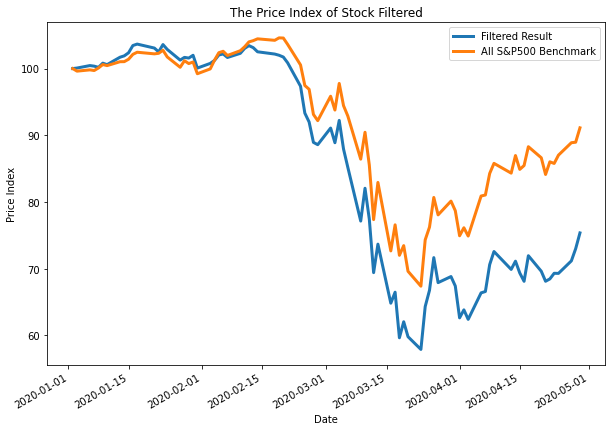

In [12]:
#Plot the filtered data frame
sp500_hist_data_closing_only.plot(
    title="The Price Index of Stock Filtered", 
    xlabel="Date", 
    ylabel="Price Index", 
    figsize=(10,7),
    legend="top",
    label="Filtered Result",
    linewidth=3
)

#Plot the "ALL" S&P500 index data frame
all_sp500_hist_data_closing_only.plot(
    legend="top",
    label="All S&P500 Benchmark",
    linewidth=3
)

In [13]:
# To do
# -------
# table and column name for industry
# integrate the SQL code with streamlit